In [39]:
import pandas as pd
import json

data_path = "../data/csv/1_csv/data_subchunk_0_100000.csv"

# Load data
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   $insert_id            100000 non-null  object
 1   amplitude_id          100000 non-null  int64 
 2   app                   100000 non-null  int64 
 3   city                  99460 non-null   object
 4   client_event_time     100000 non-null  object
 5   client_upload_time    100000 non-null  object
 6   country               100000 non-null  object
 7   data                  100000 non-null  object
 8   data_type             100000 non-null  object
 9   device_family         100000 non-null  object
 10  device_id             100000 non-null  object
 11  device_type           82502 non-null   object
 12  dma                   77130 non-null   object
 13  event_id              100000 non-null  int64 
 14  event_properties      100000 non-null  object
 15  event_time        

In [40]:
df.head()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,b5aa91c6-ac17-4bfe-8def-df50869540b0,857540442426,591532,Covington,2024-06-14 23:06:34.898000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",f10e3860-18f7-4e43-93d9-29bda5edb636
1,dc6c6dd1-8c20-4faf-8996-5fc532120b81,857540442426,591532,Covington,2024-06-14 23:06:34.926000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",38e1d5ef-96c5-4a37-bd51-dcc9808b4c00
2,d4f63da1-2385-4683-b387-06b7e75d908b,857540442426,591532,Covington,2024-06-14 23:06:34.929000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",39f12443-51ce-493e-a66a-19052bdbabd6
3,3bc7a189-4bc6-4fe7-a839-4c5c5da0e7e6,857540442426,591532,Covington,2024-06-14 23:06:34.929000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",01776264-d664-4fce-8ce1-71b97ddba191
4,a1093d16-e49c-4006-aea7-1c04d5e668ca,857540442426,591532,Covington,2024-06-14 23:06:34.944000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",963e97cb-3c8a-4efa-b52d-8713ca9b8459


In [41]:
df.columns

Index(['$insert_id', 'amplitude_id', 'app', 'city', 'client_event_time',
       'client_upload_time', 'country', 'data', 'data_type', 'device_family',
       'device_id', 'device_type', 'dma', 'event_id', 'event_properties',
       'event_time', 'event_type', 'language', 'library', 'os_name',
       'os_version', 'platform', 'processed_time', 'region',
       'server_received_time', 'server_upload_time', 'session_id', 'user_id',
       'user_properties', 'uuid'],
      dtype='object')

In [42]:
# handle nested fields

import ast
# Convert stringified JSON fields to actual dictionaries
json_columns = ["event_properties", "user_properties", "data"]

for col in json_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x)  if isinstance(x, str) else {})

# Extract relevant keys into new columns
df["event_name"] = df["event_properties"].apply(lambda x: x.get("displayName", "Unknown"))
df["event_property_type"] = df["event_properties"].apply(lambda x: x.get("type", "Unknown"))
df["event_slug"] = df["event_properties"].apply(lambda x: x.get("slug", "Unknown"))
df["event_lob"] = df["event_properties"].apply(lambda x: x.get("line-of-business", "Unknown"))

df["user_role"] = df["user_properties"].apply(lambda x: x.get("roles", ["Unknown"])[0])
df["user_hostname"] = df["user_properties"].apply(lambda x: x.get("hostname", "Unknown"))

df.drop(columns=json_columns, inplace=True)


In [43]:
df = df.drop_duplicates()
print(df.isnull().sum())

$insert_id                  0
amplitude_id                0
app                         0
city                      540
client_event_time           0
client_upload_time          0
country                     0
data_type                   0
device_family               0
device_id                   0
device_type             17498
dma                     22870
event_id                    0
event_time                  0
event_type                  0
language                    0
library                     0
os_name                     0
os_version                  0
platform                    0
processed_time              0
region                      2
server_received_time        0
server_upload_time          0
session_id                  0
user_id                   104
uuid                        0
event_name                  0
event_property_type         0
event_slug                  0
event_lob                   0
user_role                   0
user_hostname               0
dtype: int

In [44]:
# convert to datetime
time_columns = ["event_time", "client_event_time", "server_received_time"]

for col in time_columns:
    df[col] = pd.to_datetime(df[col])

# Extract time-based features
df["event_date"] = df["event_time"].dt.date
df["event_time_of_day"] = df["event_time"].dt.time
df["event_hour"] = df["event_time"].dt.hour
df["event_weekday"] = df["event_time"].dt.weekday

In [45]:
df['event_type']

0                    account-lines::widget:render
1                    account-lines::layout:render
2        account-lines::configurable-table:render
3                            account-lines:::view
4                    account-lines::widget:render
                           ...                   
99995    account-lines::configurable-table:render
99996    account-lines::configurable-table:render
99997    account-lines::configurable-table:render
99998    account-lines::configurable-table:render
99999                account-lines::widget:render
Name: event_type, Length: 100000, dtype: object

In [46]:
# Define the categorical columns to inspect
categorical_columns = ['event_name', 'event_type', 'event_slug', 'event_lob', 'event_property_type', 'user_role', 'user_hostname']

# Create a summary DataFrame
summary_df = pd.DataFrame(columns=['Total Entries', 'Non-Empty Entries', 'Empty Entries', 'Unique Categories'])

for col in categorical_columns:
    total_entries = df[col].shape[0]
    non_empty = df[col].notna().sum()
    empty = total_entries - non_empty
    unique_categories = df[col].nunique()

    summary_df.loc[col] = [total_entries, non_empty, empty, unique_categories]

summary_df

,Total Entries,Non-Empty Entries,Empty Entries,Unique Categories
event_name,100000,100000,0,205
event_type,100000,100000,0,170
event_slug,100000,100000,0,256
event_lob,100000,100000,0,21
event_property_type,100000,100000,0,4
user_role,100000,100000,0,10
user_hostname,100000,100000,0,16


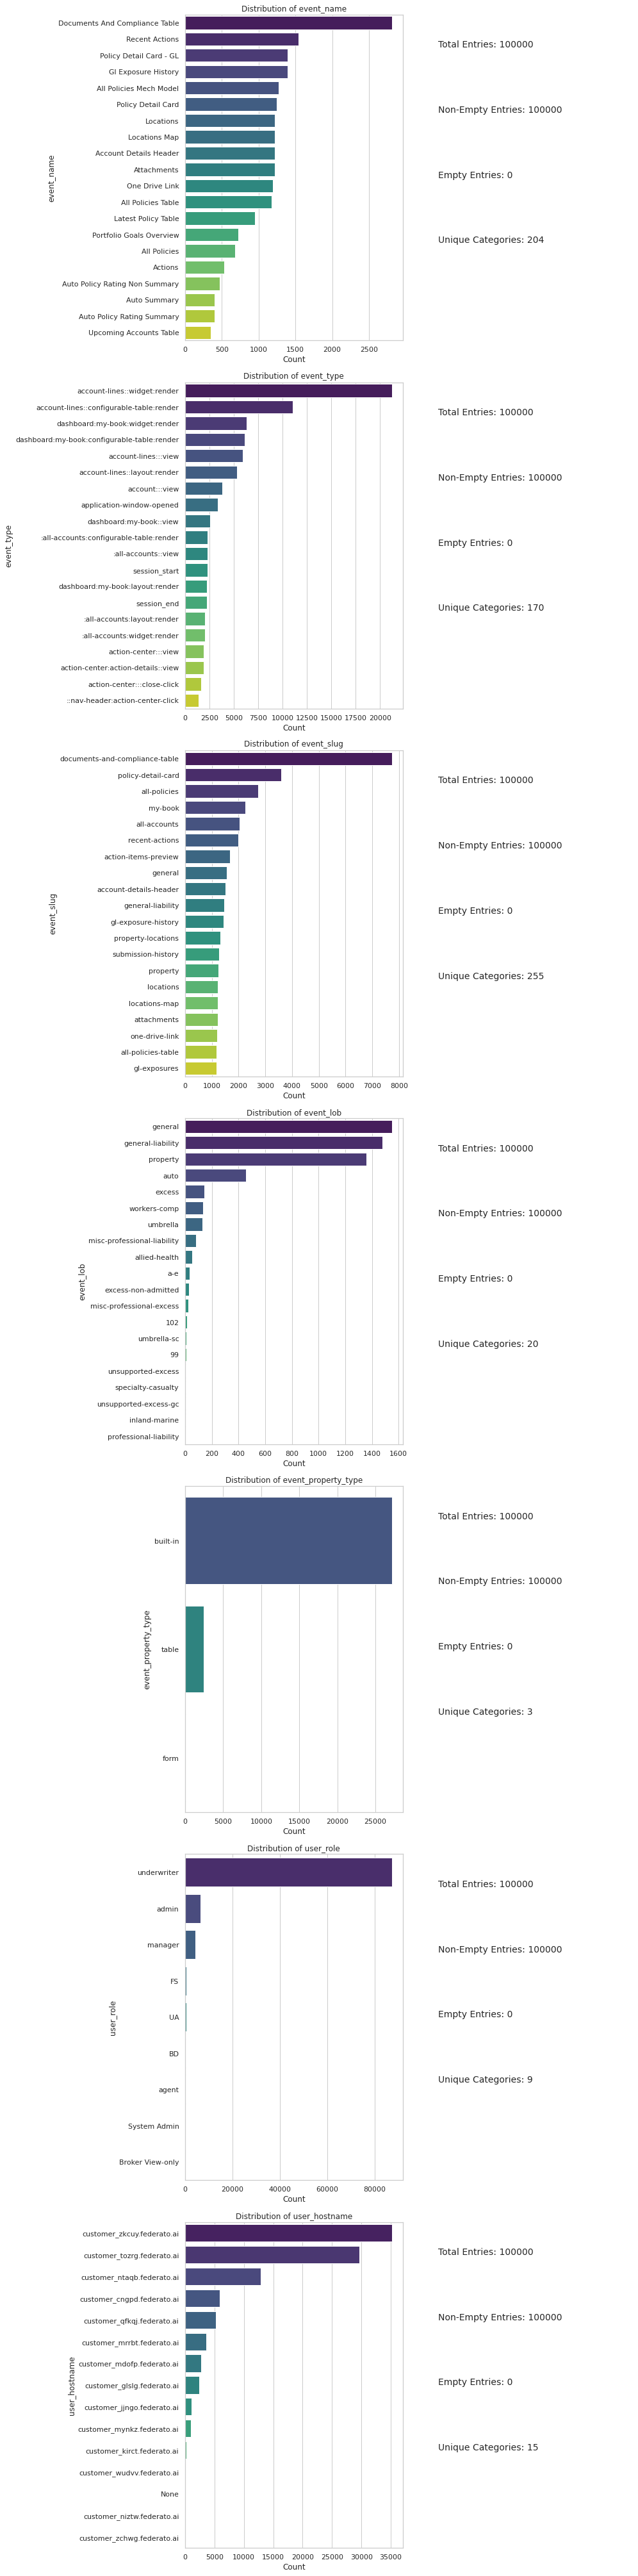

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(14, len(categorical_columns) * 8))

# Loop through each column
for idx, col in enumerate(categorical_columns):
    filtered_col = df[df[col] != 'Unknown']
    
    # Count the number of unique categories and their frequencies
    category_counts = filtered_col[col].value_counts(dropna=False)

    # Number of unique categories
    unique_categories = category_counts.index.tolist()
    
    # Limit to top 20 categories if there are more than 20
    top_categories = category_counts.head(20)
    
    # Number of non-empty and empty entries
    total_entries = len(df[col])
    non_empty_entries = total_entries - category_counts.isnull().sum()
    empty_entries = category_counts.isnull().sum()

    # Plot bar chart for the categorical column (top 20 categories)
    sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, ax=axes[idx, 0], palette="viridis")
    axes[idx, 0].set_title(f"Distribution of {col}")
    axes[idx, 0].set_xlabel("Count")
    axes[idx, 0].set_ylabel(col)

    # Plot supporting information as text
    axes[idx, 1].axis('off')  # Turn off axes for the second plot
    axes[idx, 1].text(0.1, 0.9, f"Total Entries: {total_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.7, f"Non-Empty Entries: {non_empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.5, f"Empty Entries: {empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.3, f"Unique Categories: {len(unique_categories)}", fontsize=14, ha='left')

# Show the plot
plt.tight_layout()
plt.show()
